In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns


In [36]:
df= pd.read_csv('/content/Diwali Sales Data.csv',encoding= 'unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df['Amount'] = df['Amount'].astype('int')

In [14]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [15]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


Exploratory Data Analysis of Gender


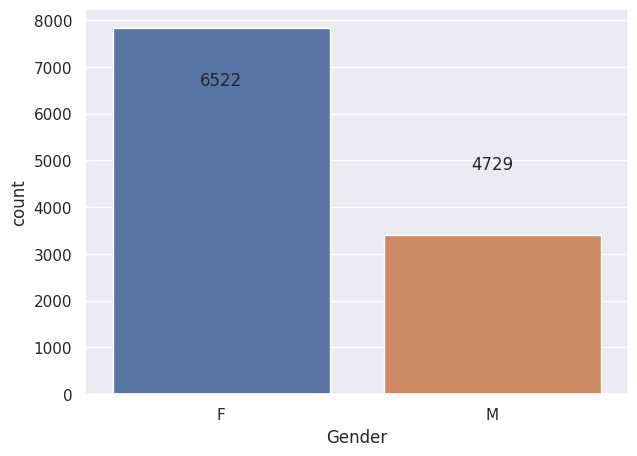

In [41]:
lm = sns.countplot(x = 'Gender',data = df)
for bars in ax.containers:
    lm.bar_label(bars)

In [47]:
diwaliSales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

<Axes: xlabel='Gender', ylabel='Amount'>

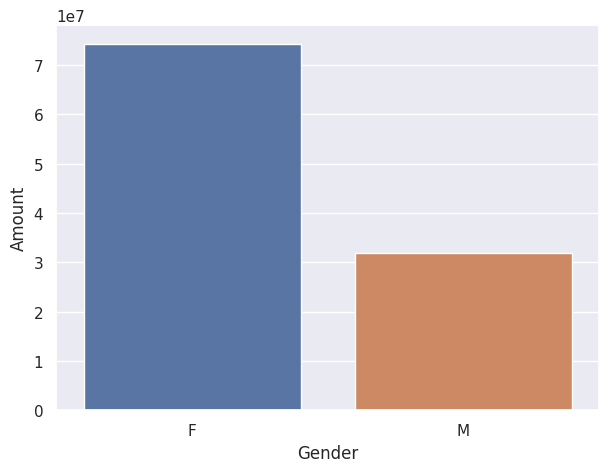

In [48]:
sns.barplot(x = 'Gender',y= 'Amount' ,data = diwaliSales_gen)

Exploratory Data Analysis of Age Group


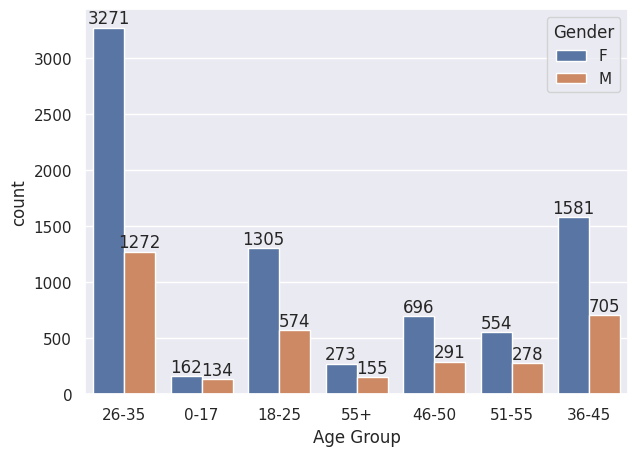

In [49]:
lm = sns.countplot( x = 'Age Group', hue = 'Gender',data=df)
for bars in lm.containers:
    lm.bar_label(bars)


In [50]:
diwaliSales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

<Axes: xlabel='Age Group', ylabel='Amount'>

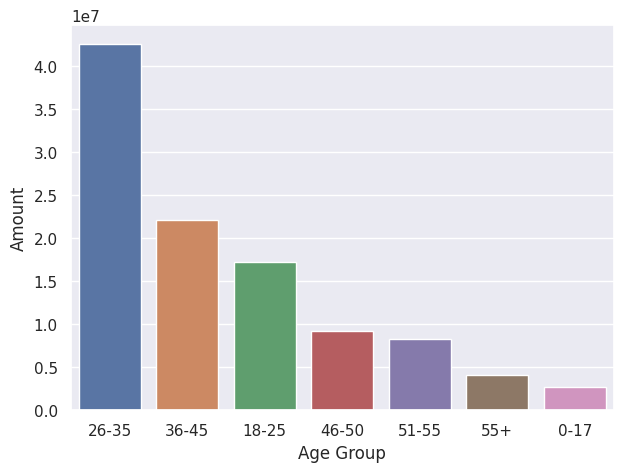

In [51]:
sns.barplot(x = 'Age Group',y= 'Amount' ,data = diwaliSales_age)

Exploratory Data Analysis of State

In [52]:
diwaliSales_State = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

<Axes: xlabel='State', ylabel='Orders'>

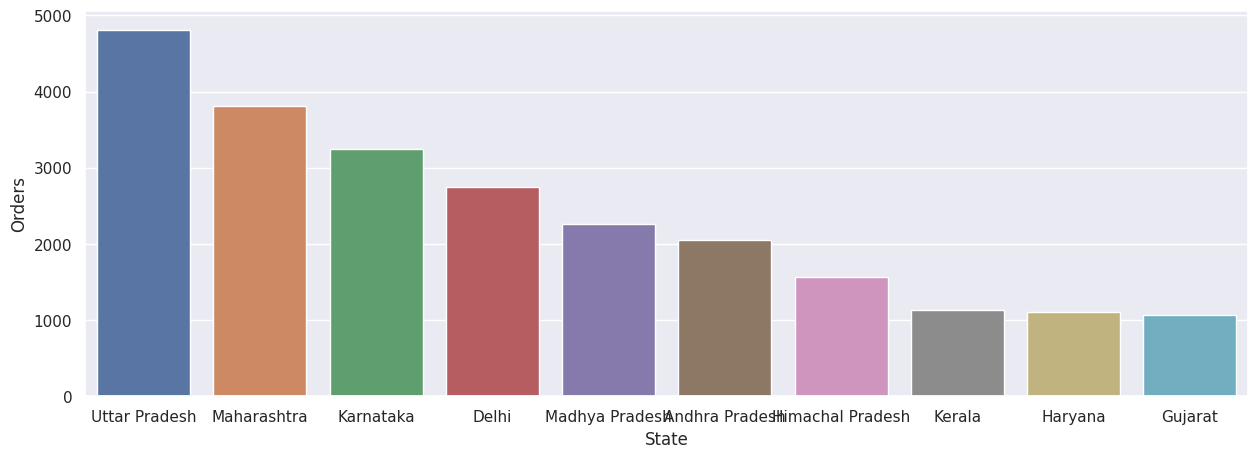

In [53]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'State',y= 'Orders',data=diwaliSales_State)


Exploratory Data Analysis of Marital Status

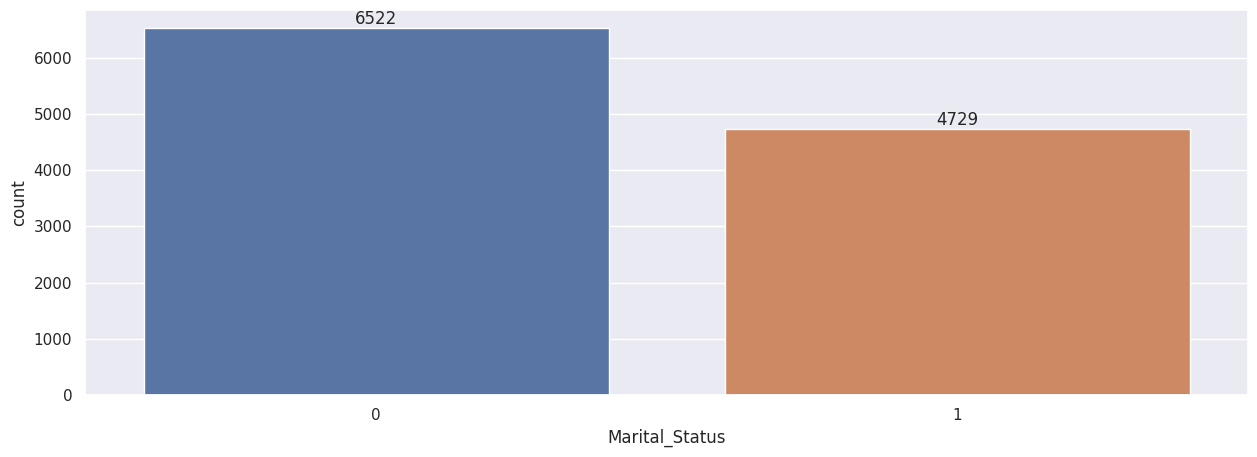

In [54]:
lm = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in lm.containers:
    lm.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

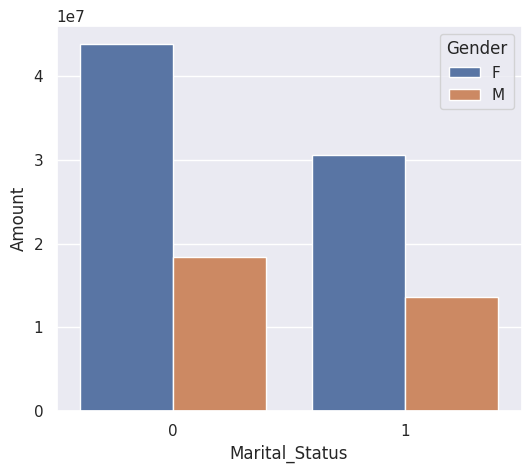

In [55]:
diwaliSales_State = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot( x = 'Marital_Status',y= 'Amount', hue='Gender',data=diwaliSales_State)

Exploratory Data Analysis of Occupation

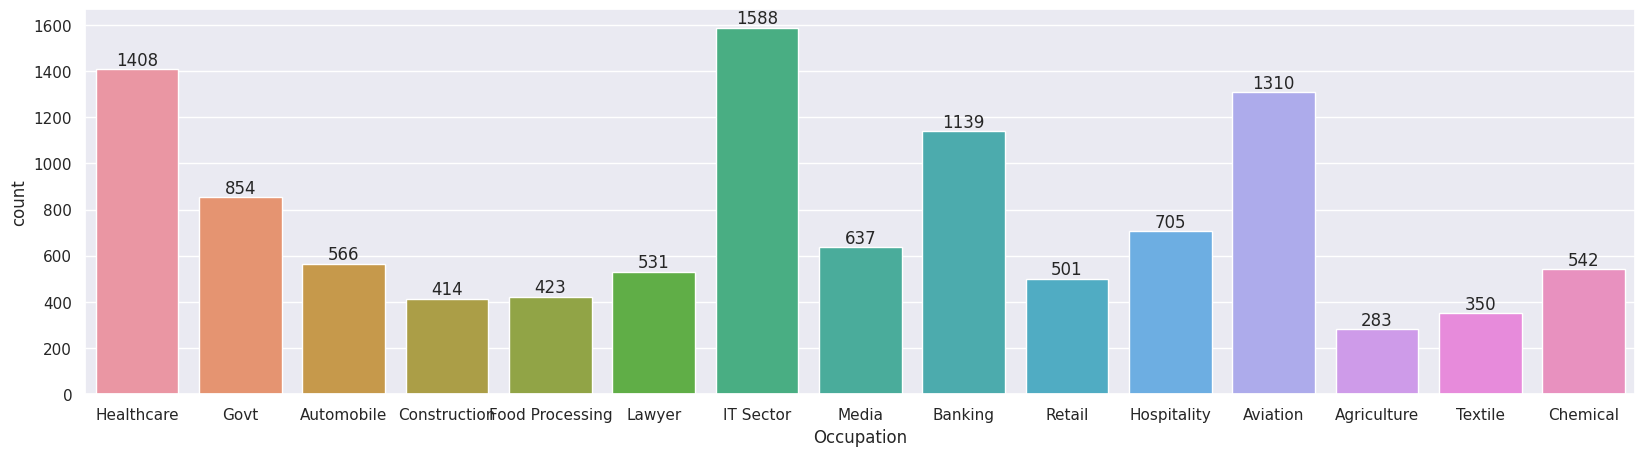

In [56]:
sns.set(rc={'figure.figsize':(20,5)})
lm = sns.countplot(data = df, x = 'Occupation')

for bars in lm.containers:
    lm.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

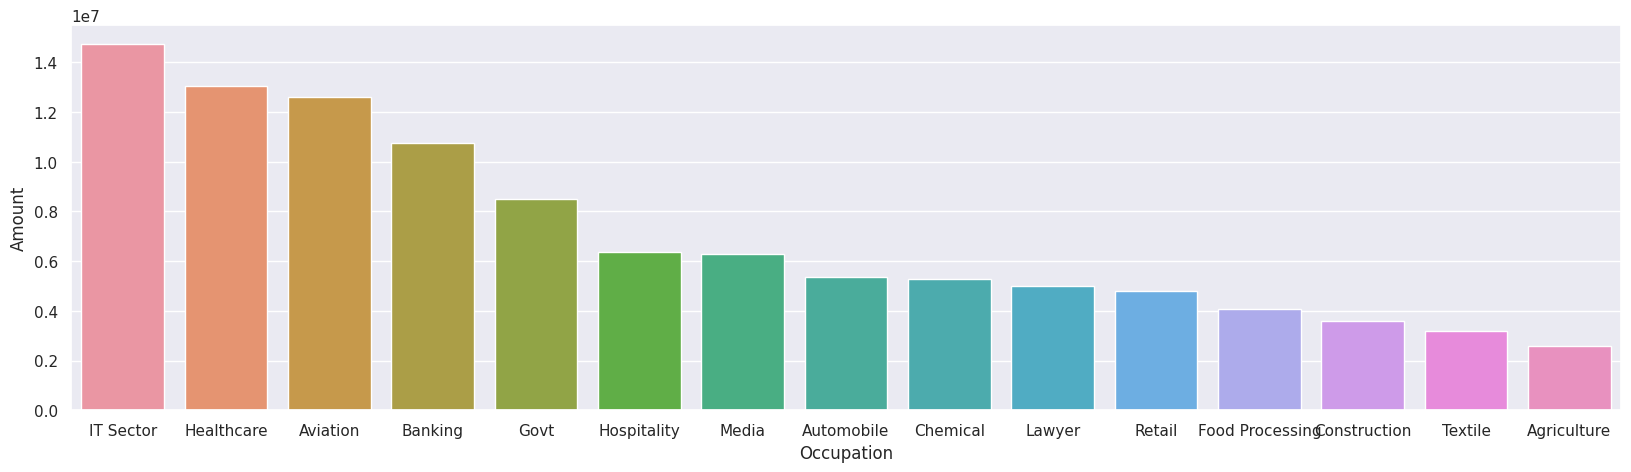

In [57]:
diwaliSales_State = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot( x = 'Occupation',y= 'Amount',data=diwaliSales_State)

Exploratory Data Analysis of Product Category

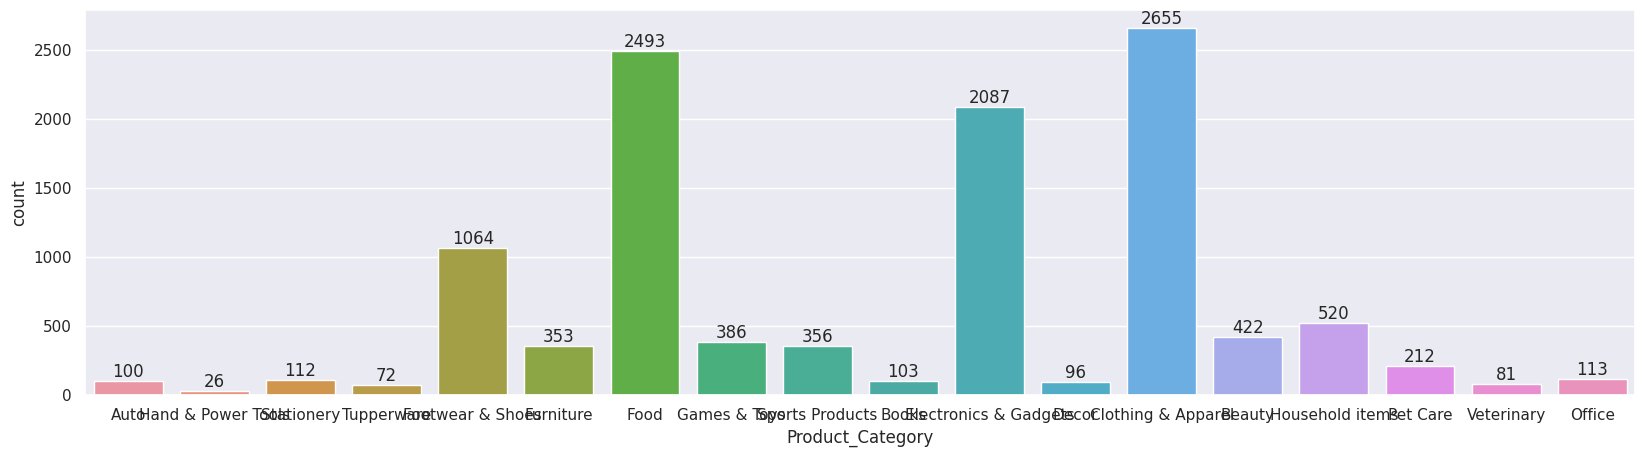

In [60]:
sns.set(rc={'figure.figsize':(20,5)})
lm= sns.countplot( x = 'Product_Category',data =df)

for bars in lm.containers:
    lm.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

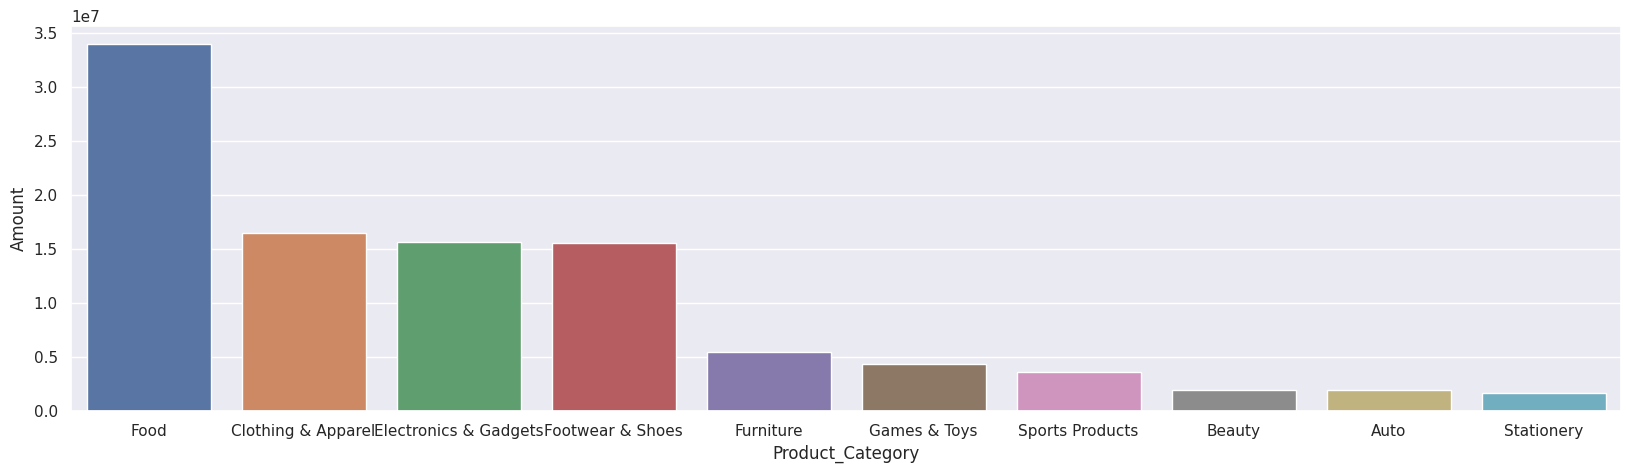

In [61]:
diwaliSales_State = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot( x = 'Product_Category',y= 'Amount',data=diwaliSales_State)